In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [61]:
animation_10frames = pd.read_csv("EGVSR_iter420000_animation_10frames.csv")
vsr_attributes = [col for col in animation_10frames if col.startswith('|__vsr_time')]
vi_attributes = [col for col in animation_10frames if col.startswith('|__vi_time')]
vsr_pds = []
vi_pds = []
for chunk_size in range(10, 70, 10):
    animation_pd = pd.read_csv(f"EGVSR_iter420000_animation_{chunk_size}frames.csv")
    vsr_attributes = [col for col in animation_pd if col.startswith('|__vsr_time')]
    vi_attributes = [col for col in animation_pd if col.startswith('|__vi_time')]
    vsr_animation = animation_pd[[vsr_attributes[0], vsr_attributes[3], '|__input_resolution']]
    vi_animation = animation_pd[[vi_attributes[0], vi_attributes[3], '|__input_resolution']]
    vsr_pds.append(vsr_animation)
    vi_pds.append(vi_animation)
all_vsr_pds = pd.concat(vsr_pds)
all_vi_pds = pd.concat(vi_pds)

In [62]:
vsr_frame_wise_time = all_vsr_pds.groupby(['|__vsr_time__001', '|__input_resolution']).mean()
vi_frame_wise_time = all_vi_pds.groupby(['|__vi_time__001', '|__input_resolution']).mean()

<AxesSubplot:xlabel='|__input_resolution'>

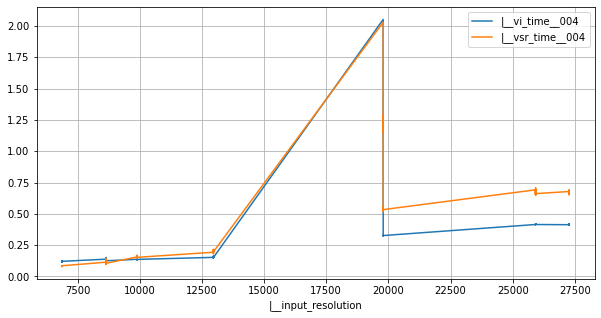

In [64]:
temp1 = pd.concat([all_vsr_pds[all_vsr_pds['|__vsr_time__001']==10].sort_values('|__input_resolution'),
all_vi_pds[all_vi_pds['|__vi_time__001']==10].sort_values('|__input_resolution')], axis=1)[['|__input_resolution','|__vsr_time__004','|__vi_time__004']]
#temp2 = temp1.drop(columns=temp1.columns[0], axis=1)
temp1 = temp1.iloc[: , 1:]
temp1.plot(x='|__input_resolution', y=['|__vi_time__004', '|__vsr_time__004'], figsize=(10,5), grid=True, style='-')

## Plotting input resolution vs vsr and vi time for the frames for 10 frames chunk

<AxesSubplot:xlabel='|__vsr_time__001'>

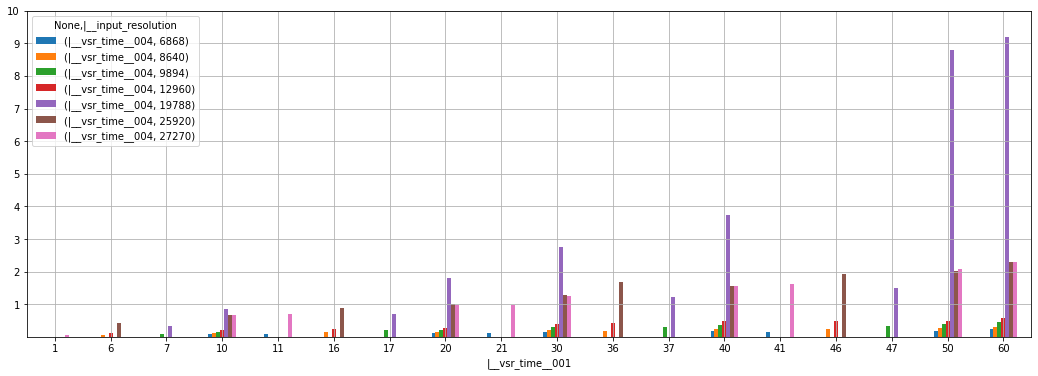

In [65]:
##TODO: repeat the experiments

## Plotting the relationship between vsr time based on number of chunk frames used and input resolution
vsr_frame_wise_time.unstack().plot(kind='bar',legend=True, figsize=(18, 6), rot=0, grid=True, yticks=[1,2,3,4,5,6,7,8,9,10])

<AxesSubplot:xlabel='|__input_resolution'>

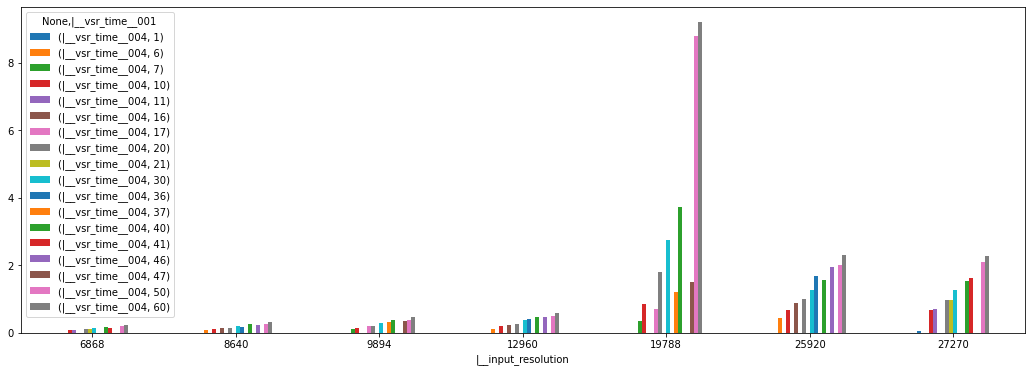

In [50]:
## Plotting the relationship between vsr time based on number of chunk frames used and input resolution
vsr_frame_wise_time = all_vsr_pds.groupby(['|__input_resolution', '|__vsr_time__001']).mean()
vi_frame_wise_time = all_vi_pds.groupby(['|__input_resolution', '|__vi_time__001']).mean()
vsr_frame_wise_time.unstack().plot(kind='bar',legend=True, figsize=(18, 6), rot=0)

In [51]:
vsr_pds = []
vi_pds = []
for chunk_size in range(10, 110, 10):
    try:
        animation_pd = pd.read_csv(f"metrics/EGVSR_iter420000_VidCatText_{chunk_size}.csv")
    except Exception as e:
        print(f"the error is: {str(e)}")
        continue
    vsr_attributes = [col for col in animation_pd if col.startswith('|__vsr_time')]
    vi_attributes = [col for col in animation_pd if col.startswith('|__vi_time')]
    vsr_animation = animation_pd[[vsr_attributes[0], vsr_attributes[3], '|__input_resolution']]
    vi_animation = animation_pd[[vi_attributes[0], vi_attributes[3], '|__input_resolution']]
    vsr_pds.append(vsr_animation)
    vi_pds.append(vi_animation)
all_vsr_pds = pd.concat(vsr_pds)
all_vi_pds = pd.concat(vi_pds)
vsr_frame_wise_time = all_vsr_pds.groupby(['|__vsr_time__001', '|__input_resolution']).mean()
vi_frame_wise_time = all_vi_pds.groupby(['|__vi_time__001', '|__input_resolution']).mean()

the error is: [Errno 2] No such file or directory: 'metrics/EGVSR_iter420000_VidCatText_70.csv'
the error is: [Errno 2] No such file or directory: 'metrics/EGVSR_iter420000_VidCatText_90.csv'


<AxesSubplot:xlabel='|__vsr_time__001'>

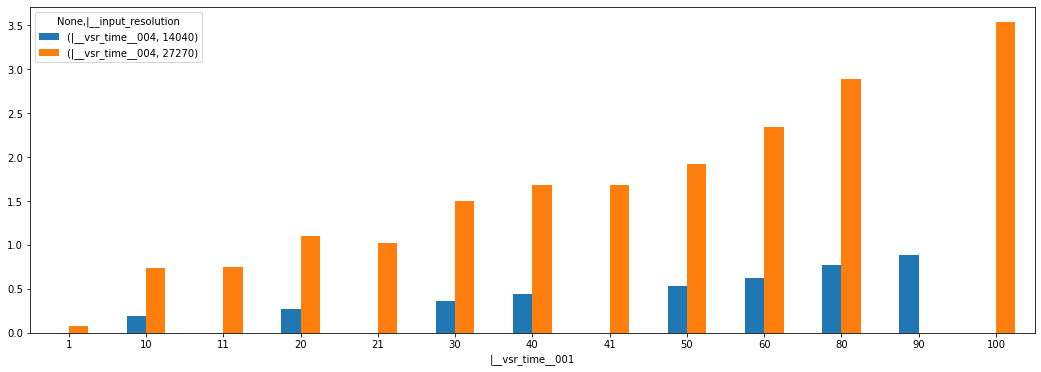

In [52]:
##TODO: take a sequence with 2000 frames and check with chunk size in range(10, 2000, 100)

##variation of vsr time with no of frames in the chunk
vsr_frame_wise_time.unstack().plot(kind='bar',legend=True, figsize=(18, 6), rot=0)

<AxesSubplot:xlabel='|__vi_time__001'>

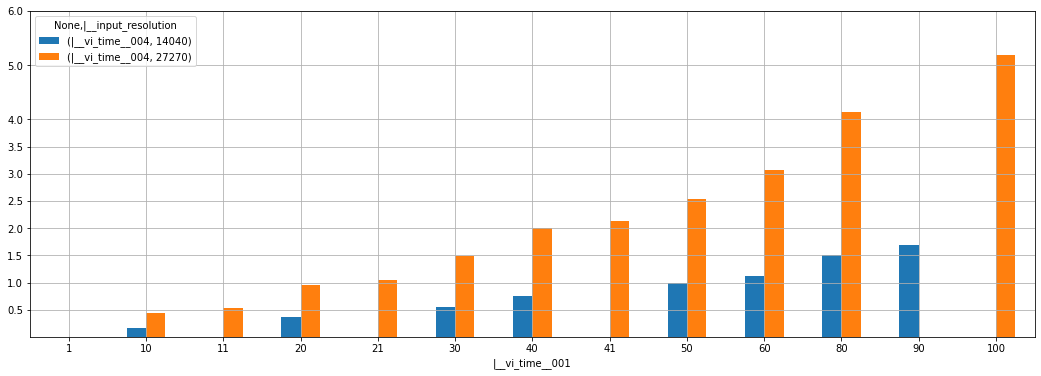

In [55]:
##variation of vi time with no of frames in the chunk
vi_frame_wise_time.unstack().plot(kind='bar',legend=True, figsize=(18, 6), rot=0, grid=True, yticks=[0.5,1,1.5,2,2.5,3,3.5,4,5,6])

In [246]:
all_vsr_pds_27270 = all_vsr_pds[all_vsr_pds['|__input_resolution']==27270].drop('|__input_resolution', axis=1)

In [247]:
all_vi_pds_27270 = all_vi_pds[all_vi_pds['|__input_resolution']==27270].drop('|__input_resolution', axis=1)

In [248]:
#all_vi_pds_27270.plot.scatter('|__vi_time__001', '|__vi_time__004')
#all_vsr_pds_27270.plot.scatter('|__vsr_time__001', '|__vsr_time__004')

In [249]:
temp = pd.concat([all_vi_pds_27270.sort_values('|__vi_time__001'), all_vsr_pds_27270.sort_values('|__vsr_time__001')], axis=1)[['|__vi_time__001', '|__vi_time__004', '|__vsr_time__004']]

<AxesSubplot:xlabel='|__vi_time__001'>

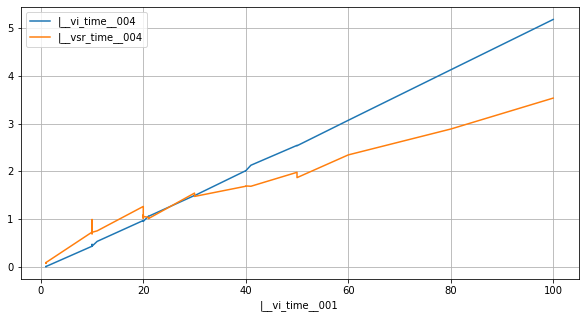

In [250]:
## Perceprulal result comparision

##Plotting vi and vsr time with respect to no of frames in the chunk, input resolution 27270
temp.plot(x='|__vi_time__001', y=['|__vi_time__004', '|__vsr_time__004'], figsize=(10,5), grid=True)

In [108]:
vsr_pds = []
vi_pds = []
for chunk_size in [10,40,70,100,200,300,400]:
    try:
        animation_pd = pd.read_csv(f"VSR-VI-Chunk-Processing/EGVSR_iter420000_Experiment1_{chunk_size}.csv")
    except Exception as e:
        print(f"the error is: {str(e)}")
        continue
    vsr_attributes = [col for col in animation_pd if col.startswith('vsr_time')]
    vi_attributes = [col for col in animation_pd if col.startswith('vi_time')]
    vsr_animation = animation_pd[[vsr_attributes[0], vsr_attributes[3], 'input_resolution']]
    vi_animation = animation_pd[[vi_attributes[0], vi_attributes[3], 'input_resolution']]
    vsr_pds.append(vsr_animation)
    vi_pds.append(vi_animation)
all_vsr_pds = pd.concat(vsr_pds)
all_vi_pds = pd.concat(vi_pds)
vsr_frame_wise_time = all_vsr_pds.groupby(['vsr_time__001', 'input_resolution']).mean()
vi_frame_wise_time = all_vi_pds.groupby(['vi_time__001', 'input_resolution']).mean()

<AxesSubplot:xlabel='vsr_time__001'>

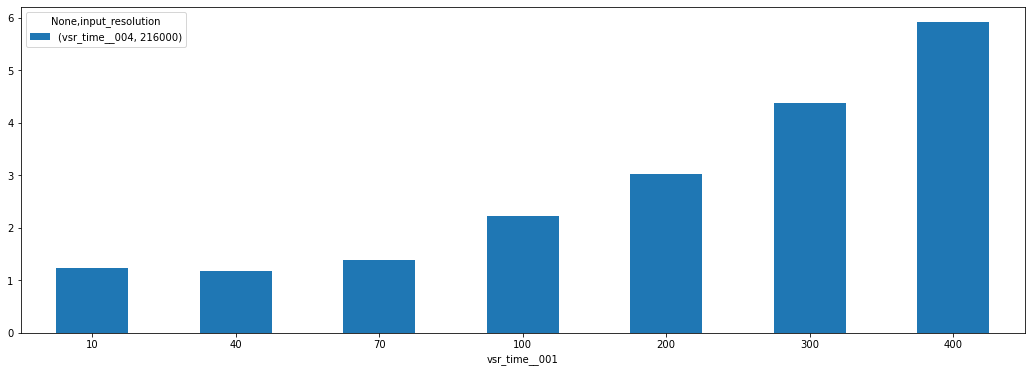

In [109]:
vsr_frame_wise_time.unstack().plot(kind='bar',legend=True, figsize=(18, 6), rot=0)

<AxesSubplot:xlabel='vi_time__001'>

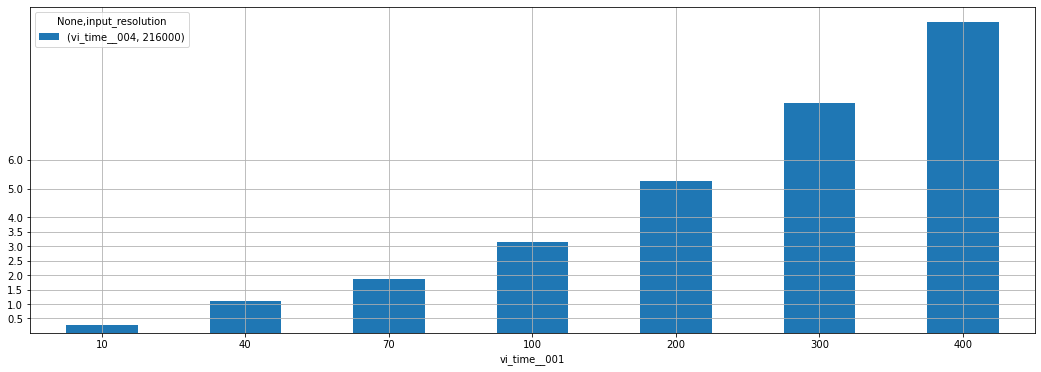

In [110]:
vi_frame_wise_time.unstack().plot(kind='bar',legend=True, figsize=(18, 6), rot=0, grid=True, yticks=[0.5,1,1.5,2,2.5,3,3.5,4,5,6])

In [114]:
all_vsr_pds_216000 = all_vsr_pds[all_vsr_pds['input_resolution']==216000].drop('input_resolution', axis=1)
all_vi_pds_216000 = all_vi_pds[all_vi_pds['input_resolution']==216000].drop('input_resolution', axis=1)
temp = pd.concat([all_vi_pds_216000.sort_values('vi_time__001'), all_vsr_pds_216000.sort_values('vsr_time__001')], axis=1)[['vi_time__001', 'vi_time__004', 'vsr_time__004']]

<AxesSubplot:xlabel='vi_time__001'>

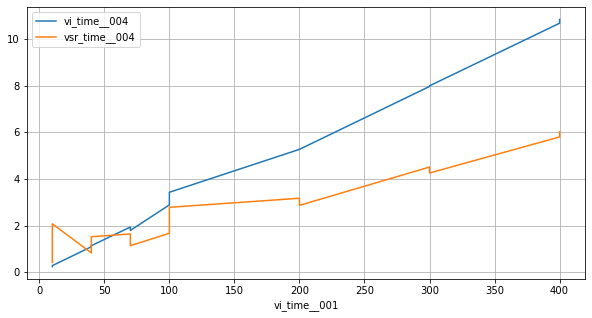

In [115]:
temp.plot(x='vi_time__001', y=['vi_time__004', 'vsr_time__004'], figsize=(10,5), grid=True)

In [124]:
chunk_sizes = [10,40,70,100]
chunk_sizes.extend([i for i in range(100, 1250, 100)])

path = "VSR-VI-Chunk-Processing/metrics/"
category = "Experiment1"
video_sequence = "01"
vsr_duration = []
vi_duration = []
for chunk_size in chunk_sizes:
    file = f"{path}EGVSR_iter420000_{category}_{chunk_size}.json"
    f = open(file)
    data = json.load(f)
    
    vsr_duration.append(data[category][video_sequence]['vsr_time'][0][3])
    vi_duration.append(data[category][video_sequence]['vi_time'][0][3])
        
    
    
    

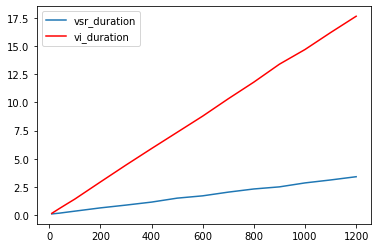

In [125]:
plt.plot(chunk_sizes, vsr_duration, label = "vsr_duration")
plt.plot(chunk_sizes, vi_duration, label = "vi_duration", color='red')
plt.legend()
plt.show()

In [251]:
#VID2 analysis by supposing the VSR and VI model can run in parallel
### LEGACY ###
# video_sequence = 'vid2'
# video_sequence_frame_count_mapping={"vid2": 90, "1": 101}
# no_total_frames = video_sequence_frame_count_mapping[video_sequence]

# #for chunk_size in range(10, 110, 10):
# for chunk_size in range(80, 82, 10):
#     try:
#         text_pd = pd.read_csv(f"metrics/EGVSR_iter420000_VidCatText_{chunk_size}.csv")
#     except Exception as e:
#         print(f"the error is: {str(e)}")
#         continue
#     vsr_attributes = [col for col in animation_pd if col.startswith('|__vsr_time')]
#     vi_attributes = [col for col in animation_pd if col.startswith('|__vi_time')]
    
#     vsr_text = text_pd[[vsr_attributes[0], vsr_attributes[3], '|__input_resolution', '|']]
#     vi_text = text_pd[[vi_attributes[0], vi_attributes[3], '|__input_resolution', '|']]
    
#     vsr_chunk_durations = list(vsr_text[vsr_text['|'] == video_sequence]['|__vsr_time__004'])
#     vi_chunk_durations = list(vi_text[vi_text['|'] == video_sequence]['|__vi_time__004'])
    
#     start_time = 0
#     vi_out_time = 0
#     input_fps = 30
#     input_chunk_duration = chunk_size/input_fps
#     total_time_taken = 0
#     for i in range(0, no_total_frames, chunk_size):

#         vsr_chunk_duration = vsr_chunk_durations[int(i/chunk_size)]
#         vi_chunk_duration = vi_chunk_durations[int(i/chunk_size)]
        
#         print(vsr_chunk_duration, vi_chunk_duration)

#         vsr_input_time = start_time + input_chunk_duration*(i/chunk_size)

#         after_vsr_time = vsr_input_time + vsr_chunk_duration
#         #print(prev_vi_out_time)
#         #print(after_vsr_time)

#         extra_time = max(0, after_vsr_time-vi_out_time)
#         print(f"The extra time is {extra_time}")

#         total_time_taken += extra_time

#         vi_out_time = max(after_vsr_time, vi_out_time) + vi_chunk_duration

#         total_time_taken += vi_chunk_duration

#         print(total_time_taken)

#     print(f"The total_time_taken for {video_sequence} with {chunk_size} and parralel execution is {total_time_taken}")
#     print(f"The corresponding fps is {no_total_frames/total_time_taken}")

#TODO: Calculate the average wait time   

In [10]:
#VID2 analysis by supposing the VSR and VI model can run in parallel

video_sequence = 'vid2'
video_sequence_frame_count_mapping={"vid2": 90, "1": 101}
no_total_frames = video_sequence_frame_count_mapping[video_sequence]
chunk_sizes = []
new_fps = []
old_fps = []
psnr = []
input_fps = 30
for chunk_size in range(10, 110, 10):
#for chunk_size in range(10, 11, 10):
    try:
        text_pd = pd.read_csv(f"metrics/EGVSR_iter420000_VidCatText_{chunk_size}.csv")
    except Exception as e:
        print(f"the error is: {str(e)}")
        continue
        
    old_fps.append(text_pd[text_pd['|'] == video_sequence]['|__average_fps'].max())
    psnr.append(text_pd[text_pd['|'] == video_sequence]['|__PSNR'].max())
    
    vsr_attributes = [col for col in text_pd if col.startswith('|__vsr_time')]
    vi_attributes = [col for col in text_pd if col.startswith('|__vi_time')]
    
    vsr_text = text_pd[[vsr_attributes[0], vsr_attributes[3], '|__input_resolution', '|']]
    vi_text = text_pd[[vi_attributes[0], vi_attributes[3], '|__input_resolution', '|']]
    
    vsr_chunk_durations = list(vsr_text[vsr_text['|'] == video_sequence]['|__vsr_time__004'])
    vi_chunk_durations = list(vi_text[vi_text['|'] == video_sequence]['|__vi_time__004'])
    
    start_time = 0
    vi_out_time = 0

    after_vsr_time = 0
    vsr_input_time = 0
    #input_chunk_duration = chunk_size/input_fps
    total_time_taken = 0
    for i in range(0, no_total_frames, chunk_size):
        left_out_frames = no_total_frames-i
        #print(f"The number of left out frames are {left_out_frames}")
        input_chunk_duration = min(chunk_size, left_out_frames)/input_fps
        #print(f"The input_chunk_duration is {input_chunk_duration}")

        vsr_chunk_duration = vsr_chunk_durations[int(i/chunk_size)]
        vi_chunk_duration = vi_chunk_durations[int(i/chunk_size)]
        
        #print(vsr_chunk_duration, vi_chunk_duration)

        #vsr_input_time = start_time + input_chunk_duration*(i/chunk_size)
        vsr_input_time = max(vsr_input_time + input_chunk_duration, after_vsr_time) if i!=0 else 0
        #start_time = max(start_time + input_chunk_duration, after_vsr_time)

        after_vsr_time = vsr_input_time + vsr_chunk_duration
        #print(prev_vi_out_time)
        #print(after_vsr_time)

        extra_time = max(0, after_vsr_time-vi_out_time)
        #print(f"The extra time is {extra_time}")

        total_time_taken += extra_time

        vi_out_time = max(after_vsr_time, vi_out_time) + vi_chunk_duration

        total_time_taken += vi_chunk_duration
        #print(vsr_input_time, after_vsr_time, vi_out_time)
        #print(total_time_taken)

    #print(f"The total_time_taken for {video_sequence} with {chunk_size} and parralel execution is {total_time_taken}")
    #print(f"The corresponding fps is {no_total_frames/total_time_taken}")
    
    chunk_sizes.append(chunk_size)
    new_fps.append(no_total_frames/total_time_taken) 
    
##TODO: Calculate the average wait time   

the error is: [Errno 2] No such file or directory: 'metrics/EGVSR_iter420000_VidCatText_70.csv'
the error is: [Errno 2] No such file or directory: 'metrics/EGVSR_iter420000_VidCatText_90.csv'


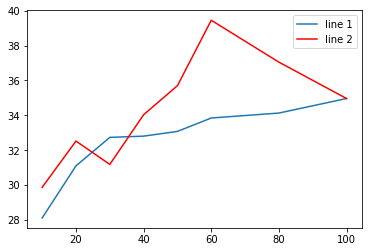

In [11]:
# plot lines
plt.plot(chunk_sizes, old_fps, label = "line 1")
plt.plot(chunk_sizes, new_fps, label = "line 2", color='red')
plt.legend()
plt.show()

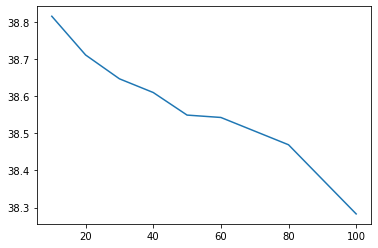

In [254]:
plt.plot(chunk_sizes, psnr, label = "psnr")

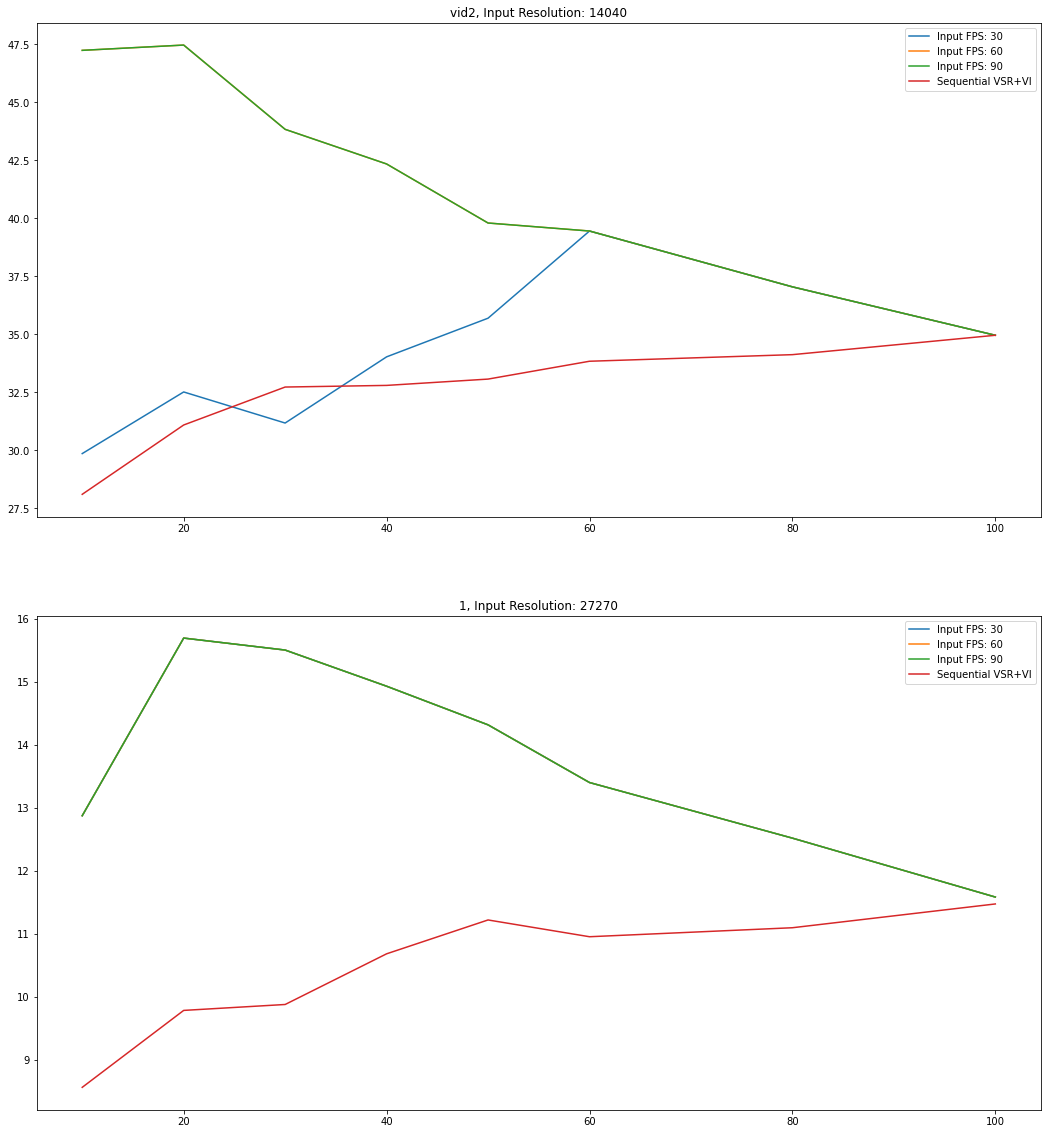

In [69]:
##variation of input fps by changing the input fps

video_sequence_frame_count_mapping={"Text":{"vid2": 90, "1": 101}, "Animation":{1:97,2:96,3:96,4:101,5:101,6:97,7:96,8:96,9:101}}
video_category = "Text"

chunk_sizes = [10, 20, 30, 40, 50, 60, 80, 100]
# new_fps = []
# old_fps = []
psnr = []
all_input_fps = [30,60,90]
fig = plt.figure(figsize=(18,20))
no_video_sequences = len(video_sequence_frame_count_mapping[video_category].keys())
for i, video_sequence in enumerate(video_sequence_frame_count_mapping[video_category].keys()):

    ax = fig.add_subplot(no_video_sequences,1,i+1)
    no_total_frames = video_sequence_frame_count_mapping[video_category][video_sequence]
    for input_fps in all_input_fps:
        new_fps = []
        old_fps = []
        psnr = []
        for chunk_size in chunk_sizes:
            try:
                text_pd = pd.read_csv(f"VSR-VI-Chunk-Processing/EGVSR_iter420000_VidCat{video_category}_{chunk_size}.csv")
            except Exception as e:
                print(f"the error is: {str(e)}")
                continue

            old_fps.append(text_pd[text_pd['|'] == video_sequence]['|__average_fps'].max())
            psnr.append(text_pd[text_pd['|'] == video_sequence]['|__PSNR'].max())
            input_resolution = text_pd[text_pd['|'] == video_sequence]['|__input_resolution'].max()

            vsr_attributes = [col for col in text_pd if col.startswith('|__vsr_time')]
            vi_attributes = [col for col in text_pd if col.startswith('|__vi_time')]

            vsr_text = text_pd[[vsr_attributes[0], vsr_attributes[3], '|__input_resolution', '|']]
            vi_text = text_pd[[vi_attributes[0], vi_attributes[3], '|__input_resolution', '|']]

            vsr_chunk_durations = list(vsr_text[vsr_text['|'] == video_sequence]['|__vsr_time__004'])
            vi_chunk_durations = list(vi_text[vi_text['|'] == video_sequence]['|__vi_time__004'])

            start_time = 0
            vi_out_time = 0

            after_vsr_time = 0
            vsr_input_time = 0
            #input_chunk_duration = chunk_size/input_fps
            total_time_taken = 0
            for i in range(0, no_total_frames, chunk_size):
                left_out_frames = no_total_frames-i
                #print(f"The number of left out frames are {left_out_frames}")
                input_chunk_duration = min(chunk_size, left_out_frames)/input_fps
                #print(f"The input_chunk_duration is {input_chunk_duration}")

                vsr_chunk_duration = vsr_chunk_durations[int(i/chunk_size)]
                vi_chunk_duration = vi_chunk_durations[int(i/chunk_size)]

                #print(vsr_chunk_duration, vi_chunk_duration)

                #vsr_input_time = start_time + input_chunk_duration*(i/chunk_size)
                vsr_input_time = max(vsr_input_time + input_chunk_duration, after_vsr_time) if i!=0 else 0
                #start_time = max(start_time + input_chunk_duration, after_vsr_time)

                after_vsr_time = vsr_input_time + vsr_chunk_duration
                #print(prev_vi_out_time)
                #print(after_vsr_time)

                extra_time = max(0, after_vsr_time-vi_out_time)
                #print(f"The extra time is {extra_time}")

                total_time_taken += extra_time

                vi_out_time = max(after_vsr_time, vi_out_time) + vi_chunk_duration

                total_time_taken += vi_chunk_duration
                #print(vsr_input_time, after_vsr_time, vi_out_time)
                #print(total_time_taken)

            #print(f"The total_time_taken for {video_sequence} with {chunk_size} and parralel execution is {total_time_taken}")
            #print(f"The corresponding fps is {no_total_frames/total_time_taken}")

            new_fps.append(no_total_frames/total_time_taken)

        ax.plot(chunk_sizes, new_fps, label = f"Input FPS: {input_fps}")


    ax.plot(chunk_sizes, old_fps, label = f"Sequential VSR+VI")
    plt.legend()
    plt.title(f"{video_sequence}, Input Resolution: {input_resolution}")
plt.show()

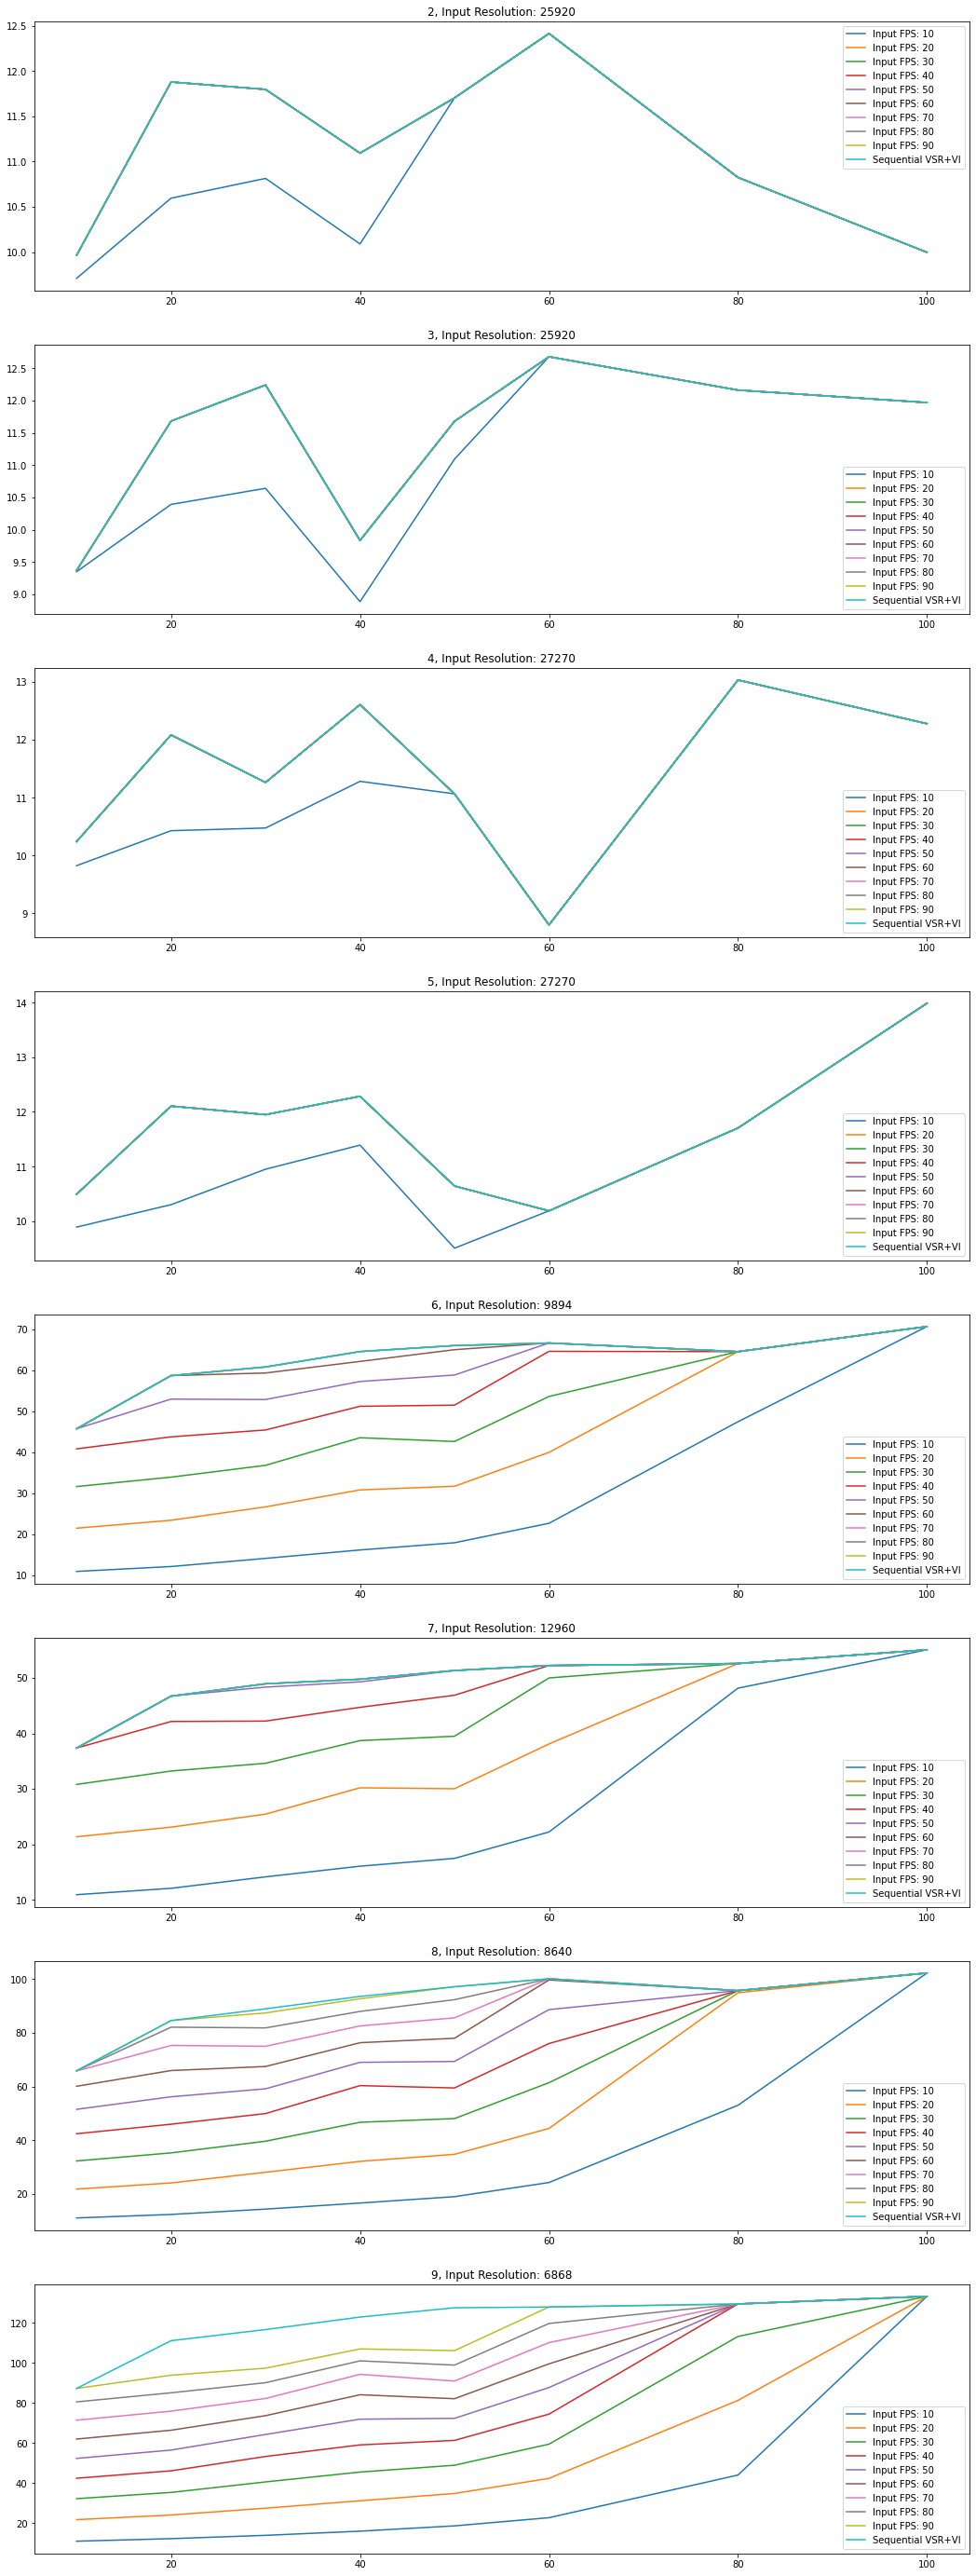

{2: {10: [9.710278450622837, 10.59567104857405, 10.81384124246825, 10.090551211765904, 11.702614290562035, 12.413463566655375, 10.824400816781141, 9.997926039595402], 20: [9.964782241356998, 11.878036292172132, 11.79624200198081, 11.092806315485724, 11.702614290562035, 12.413463566655375, 10.824400816781141, 9.997926039595402], 30: [9.964782241356998, 11.878036292172132, 11.79624200198081, 11.092806315485724, 11.702614290562035, 12.413463566655375, 10.824400816781141, 9.997926039595402], 40: [9.964782241356998, 11.878036292172132, 11.79624200198081, 11.092806315485724, 11.702614290562035, 12.413463566655375, 10.824400816781141, 9.997926039595402], 50: [9.964782241356998, 11.878036292172132, 11.79624200198081, 11.092806315485724, 11.702614290562035, 12.413463566655375, 10.824400816781141, 9.997926039595402], 60: [9.964782241356998, 11.878036292172132, 11.79624200198081, 11.092806315485724, 11.702614290562035, 12.413463566655375, 10.824400816781141, 9.997926039595402], 70: [9.96478224135

In [93]:
##variation of input fps by changing the input fps
#video_sequence_frame_count_mapping={"Text":{"vid2": 90, "1": 101}, "Animation":{1:97,2:96,3:96,4:101,5:101,6:97,7:96,8:96,9:101}}
video_sequence_frame_count_mapping={"Text":{"vid2": 90, "1": 101}, "Animation":{2:96,3:96,4:101,5:101,6:97,7:96,8:96,9:101}}
video_category = "Animation"
baseline_input_output_fps_mapping = {}
chunk_sizes = [10, 20, 30, 40, 50, 60, 80, 100]
# new_fps = []
# old_fps = []
psnr = []
all_input_fps = [10,20,30,40,50,60,70,80,90]
fig = plt.figure(figsize=(18,50))
no_video_sequences = len(video_sequence_frame_count_mapping[video_category].keys())
for i, video_sequence in enumerate(video_sequence_frame_count_mapping[video_category].keys()):
    baseline_input_output_fps_mapping[video_sequence] = {}
    ax = fig.add_subplot(no_video_sequences,1,i+1)
    no_total_frames = video_sequence_frame_count_mapping[video_category][video_sequence]
    for input_fps in all_input_fps:
        new_fps = []
        old_fps = []
        psnr = []
        for chunk_size in chunk_sizes:
            try:
                text_pd = pd.read_csv(f"Baseline-VSR-Chunk-Processing/EGVSR_iter420000_VidCat{video_category}_{chunk_size}.csv")
            except Exception as e:
                print(f"the error is: {str(e)}")
                continue

            old_fps.append(text_pd[text_pd['|'] == video_sequence]['|__average_fps'].max())
            psnr.append(text_pd[text_pd['|'] == video_sequence]['|__PSNR'].max())
            input_resolution = text_pd[text_pd['|'] == video_sequence]['|__input_resolution'].max()

            vsr_attributes = [col for col in text_pd if col.startswith('|__vsr_time')]
            vi_attributes = [col for col in text_pd if col.startswith('|__vi_time')]

            vsr_text = text_pd[[vsr_attributes[0], vsr_attributes[3], '|__input_resolution', '|']]
            vi_text = text_pd[[vi_attributes[0], vi_attributes[3], '|__input_resolution', '|']] 

            vsr_chunk_durations = list(vsr_text[vsr_text['|'] == video_sequence]['|__vsr_time__004'])
            vi_chunk_durations = list(vi_text[vi_text['|'] == video_sequence]['|__vi_time__004'])


            start_time = 0
            vi_out_time = 0

            after_vsr_time = 0
            vsr_input_time = 0
            #input_chunk_duration = chunk_size/input_fps
            total_time_taken = 0
            for i in range(0, no_total_frames, chunk_size):
                left_out_frames = no_total_frames-i
                #print(f"The number of left out frames are {left_out_frames}")
                input_chunk_duration = min(chunk_size, left_out_frames)/input_fps
                #print(f"The input_chunk_duration is {input_chunk_duration}")

                vsr_chunk_duration = vsr_chunk_durations[int(i/chunk_size)]
                vi_chunk_duration = vi_chunk_durations[int(i/chunk_size)]

                #print(vsr_chunk_duration, vi_chunk_duration)

                #vsr_input_time = start_time + input_chunk_duration*(i/chunk_size)
                vsr_input_time = max(vsr_input_time + input_chunk_duration, after_vsr_time) if i!=0 else 0
                #start_time = max(start_time + input_chunk_duration, after_vsr_time)

                after_vsr_time = vsr_input_time + vsr_chunk_duration
                #print(prev_vi_out_time)
                #print(after_vsr_time)

                extra_time = max(0, after_vsr_time-vi_out_time)
                #print(f"The extra time is {extra_time}")

                total_time_taken += extra_time

                vi_out_time = max(after_vsr_time, vi_out_time) + vi_chunk_duration

                total_time_taken += vi_chunk_duration
                #print(vsr_input_time, after_vsr_time, vi_out_time)
                #print(total_time_taken)

            #print(f"The total_time_taken for {video_sequence} with {chunk_size} and parralel execution is {total_time_taken}")
            #print(f"The corresponding fps is {no_total_frames/total_time_taken}")

            new_fps.append(no_total_frames/total_time_taken)

        ax.plot(chunk_sizes, new_fps, label = f"Input FPS: {input_fps}")
        baseline_input_output_fps_mapping[video_sequence][input_fps] = new_fps

    ax.plot(chunk_sizes, old_fps, label = f"Sequential VSR+VI")
    plt.legend()
    plt.title(f"{video_sequence}, Input Resolution: {input_resolution}")
plt.show()
print(baseline_input_output_fps_mapping)

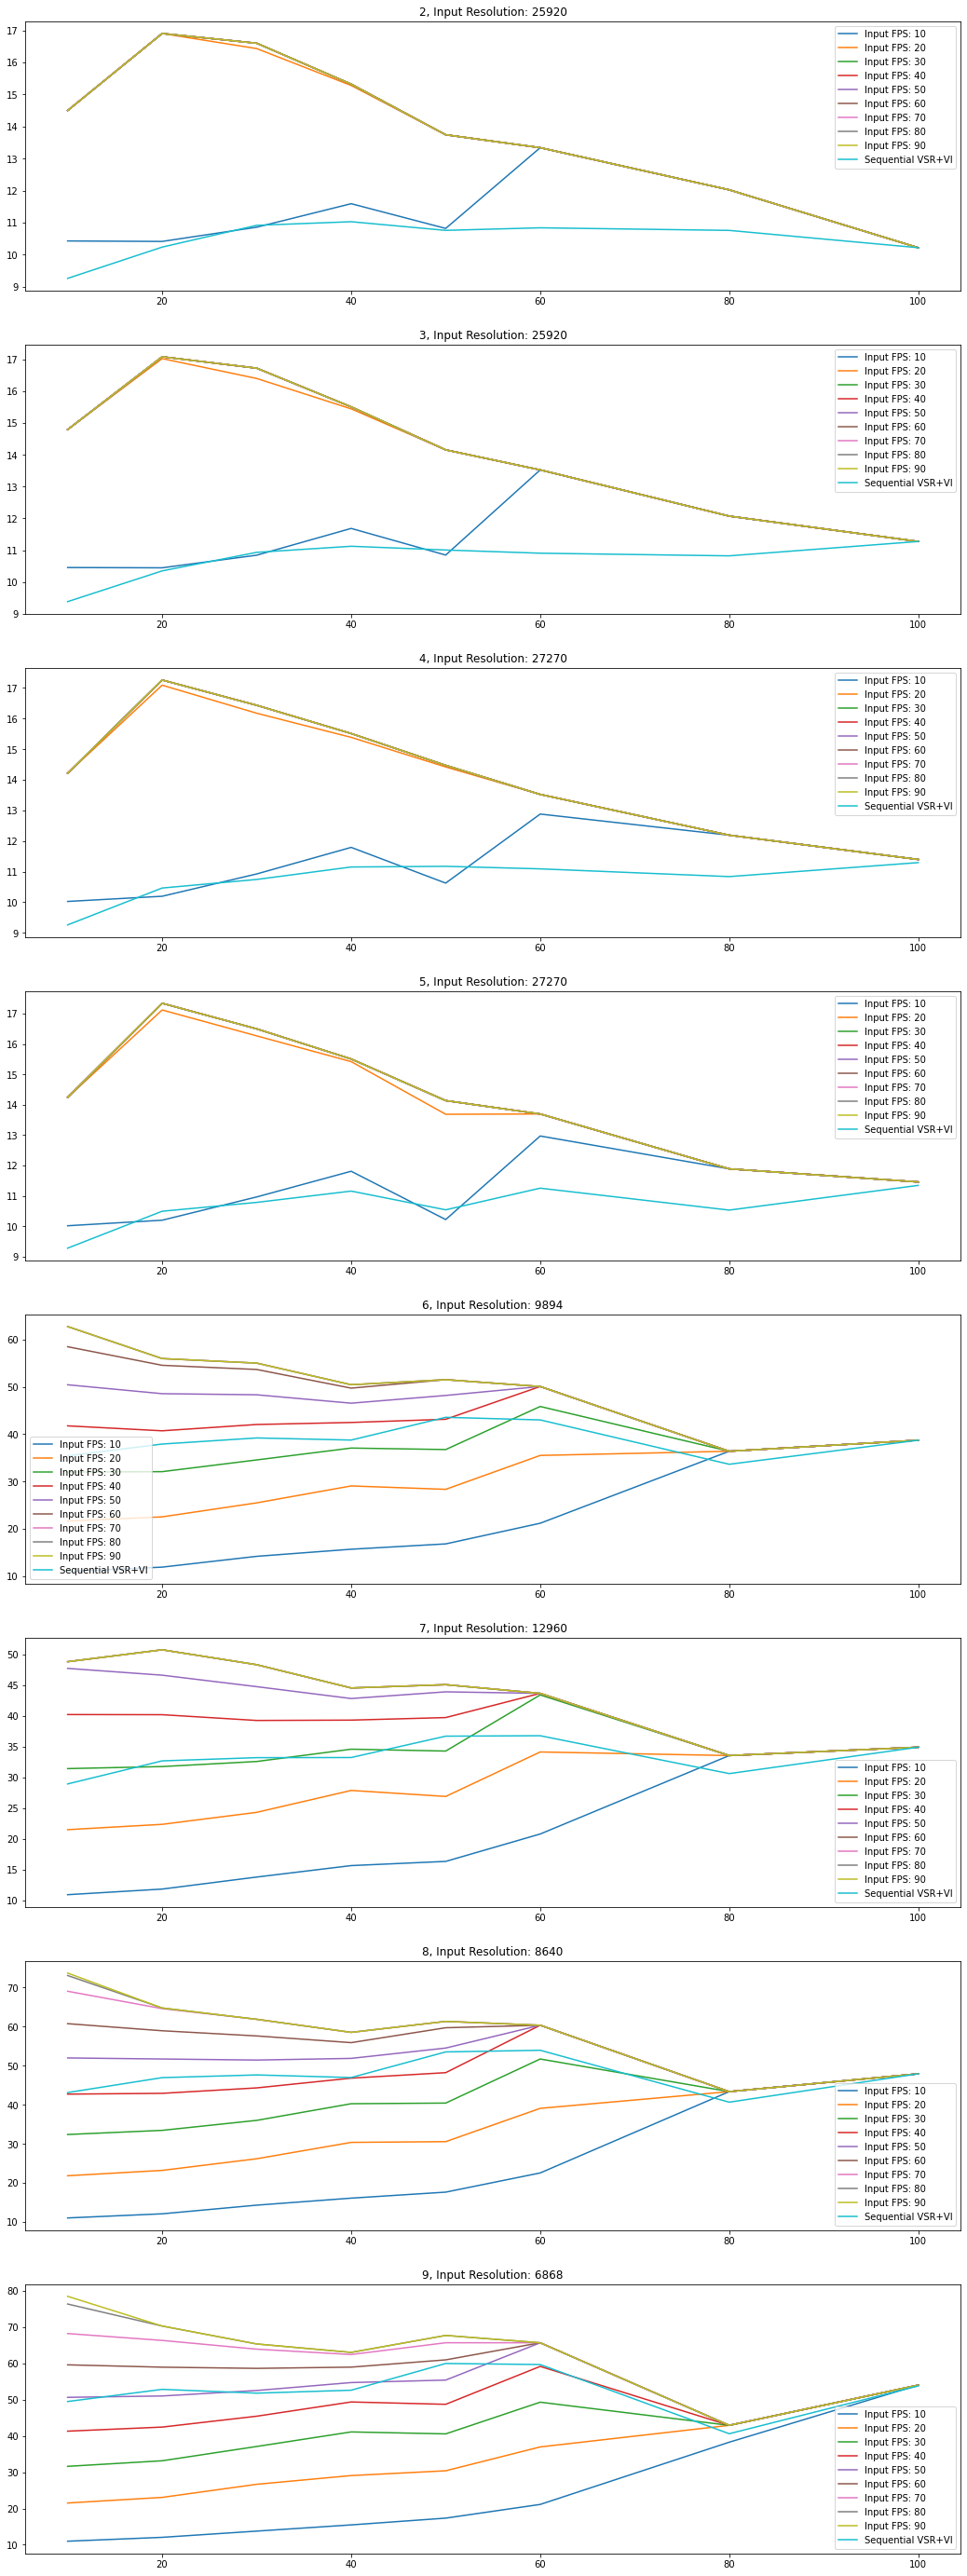

{2: {10: [10.429102273446633, 10.413948125622218, 10.858048552954418, 11.592285958663627, 10.820239701721391, 13.340334945133261, 12.024417631667358, 10.218368967439151], 20: [14.500048095224631, 16.905487089949037, 16.43450721967748, 15.28329203487201, 13.743696909567158, 13.340334945133261, 12.024417631667358, 10.218368967439151], 30: [14.500048095224631, 16.905487089949037, 16.60227848525066, 15.324850540292514, 13.743696909567158, 13.340334945133261, 12.024417631667358, 10.218368967439151], 40: [14.500048095224631, 16.905487089949037, 16.60227848525066, 15.324850540292514, 13.743696909567158, 13.340334945133261, 12.024417631667358, 10.218368967439151], 50: [14.500048095224631, 16.905487089949037, 16.60227848525066, 15.324850540292514, 13.743696909567158, 13.340334945133261, 12.024417631667358, 10.218368967439151], 60: [14.500048095224631, 16.905487089949037, 16.60227848525066, 15.324850540292514, 13.743696909567158, 13.340334945133261, 12.024417631667358, 10.218368967439151], 70: [

In [94]:
##variation of input fps by changing the input fps

video_sequence_frame_count_mapping={"Text":{"vid2": 90, "1": 101}, "Animation":{2:96,3:96,4:101,5:101,6:97,7:96,8:96,9:101}}
video_category = "Animation"
optimized_approach_input_output_fps_mapping = {}
chunk_sizes = [10, 20, 30, 40, 50, 60, 80, 100]
# new_fps = []
# old_fps = []
psnr = []
all_input_fps = [10,20,30,40,50,60,70,80,90]
fig = plt.figure(figsize=(18,50))
no_video_sequences = len(video_sequence_frame_count_mapping[video_category].keys())
for i, video_sequence in enumerate(video_sequence_frame_count_mapping[video_category].keys()):
    optimized_approach_input_output_fps_mapping[video_sequence]={}
    ax = fig.add_subplot(no_video_sequences,1,i+1)
    no_total_frames = video_sequence_frame_count_mapping[video_category][video_sequence]
    for input_fps in all_input_fps:
        new_fps = []
        old_fps = []
        psnr = []
        for chunk_size in chunk_sizes:
            try:
                text_pd = pd.read_csv(f"VSR-VI-Chunk-Processing/EGVSR_iter420000_VidCat{video_category}_{chunk_size}.csv")
            except Exception as e:
                print(f"the error is: {str(e)}")
                continue

            old_fps.append(text_pd[text_pd['|'] == video_sequence]['|__average_fps'].max())
            psnr.append(text_pd[text_pd['|'] == video_sequence]['|__PSNR'].max())
            input_resolution = text_pd[text_pd['|'] == video_sequence]['|__input_resolution'].max()

            vsr_attributes = [col for col in text_pd if col.startswith('|__vsr_time')]
            vi_attributes = [col for col in text_pd if col.startswith('|__vi_time')]

            vsr_text = text_pd[[vsr_attributes[0], vsr_attributes[3], '|__input_resolution', '|']]
            vi_text = text_pd[[vi_attributes[0], vi_attributes[3], '|__input_resolution', '|']] 

            vsr_chunk_durations = list(vsr_text[vsr_text['|'] == video_sequence]['|__vsr_time__004'])
            vi_chunk_durations = list(vi_text[vi_text['|'] == video_sequence]['|__vi_time__004'])


            start_time = 0
            vi_out_time = 0

            after_vsr_time = 0
            vsr_input_time = 0
            #input_chunk_duration = chunk_size/input_fps
            total_time_taken = 0
            for i in range(0, no_total_frames, chunk_size):
                left_out_frames = no_total_frames-i
                #print(f"The number of left out frames are {left_out_frames}")
                input_chunk_duration = min(chunk_size, left_out_frames)/input_fps
                #print(f"The input_chunk_duration is {input_chunk_duration}")

                vsr_chunk_duration = vsr_chunk_durations[int(i/chunk_size)]
                vi_chunk_duration = vi_chunk_durations[int(i/chunk_size)]

                #print(vsr_chunk_duration, vi_chunk_duration)

                #vsr_input_time = start_time + input_chunk_duration*(i/chunk_size)
                vsr_input_time = max(vsr_input_time + input_chunk_duration, after_vsr_time) if i!=0 else 0
                #start_time = max(start_time + input_chunk_duration, after_vsr_time)

                after_vsr_time = vsr_input_time + vsr_chunk_duration
                #print(prev_vi_out_time)
                #print(after_vsr_time)

                extra_time = max(0, after_vsr_time-vi_out_time)
                #print(f"The extra time is {extra_time}")

                total_time_taken += extra_time

                vi_out_time = max(after_vsr_time, vi_out_time) + vi_chunk_duration

                total_time_taken += vi_chunk_duration
                #print(vsr_input_time, after_vsr_time, vi_out_time)
                #print(total_time_taken)

            #print(f"The total_time_taken for {video_sequence} with {chunk_size} and parralel execution is {total_time_taken}")
            #print(f"The corresponding fps is {no_total_frames/total_time_taken}")

            new_fps.append(no_total_frames/total_time_taken)

        
        ax.plot(chunk_sizes, new_fps, label = f"Input FPS: {input_fps}")
        optimized_approach_input_output_fps_mapping[video_sequence][input_fps] = new_fps


    ax.plot(chunk_sizes, old_fps, label = f"Sequential VSR+VI")
    plt.legend()
    plt.title(f"{video_sequence}, Input Resolution: {input_resolution}")
plt.show()
print(optimized_approach_input_output_fps_mapping)

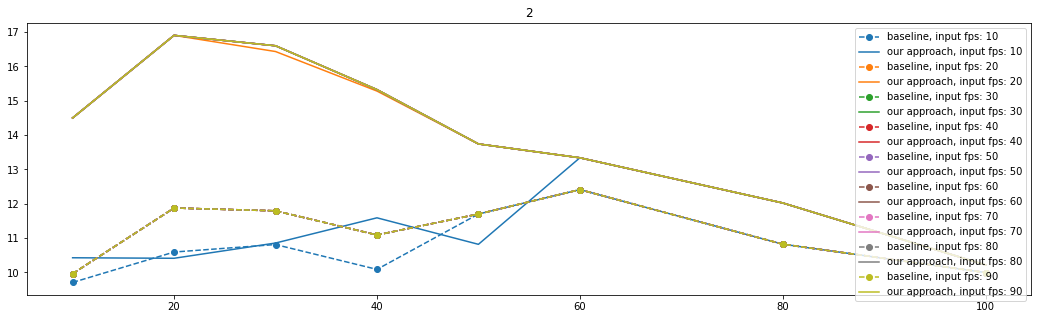

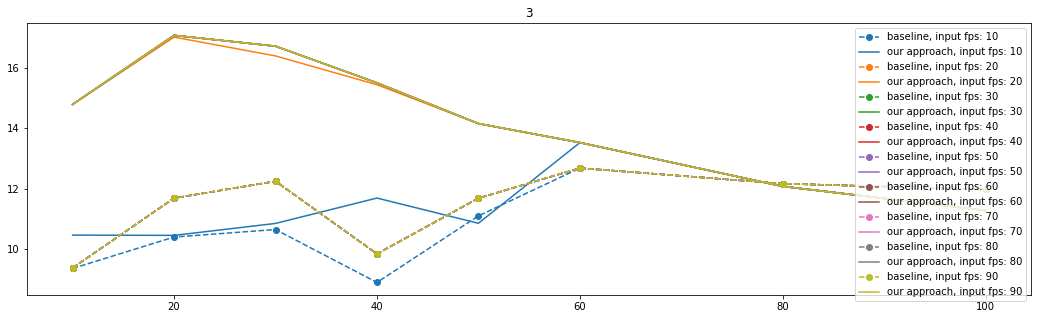

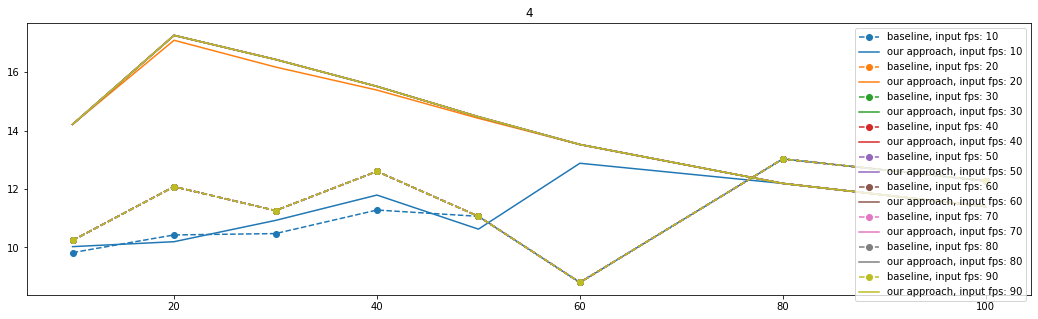

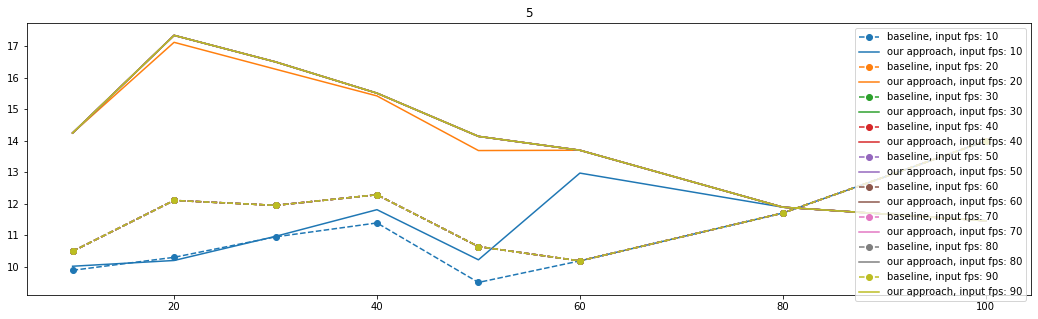

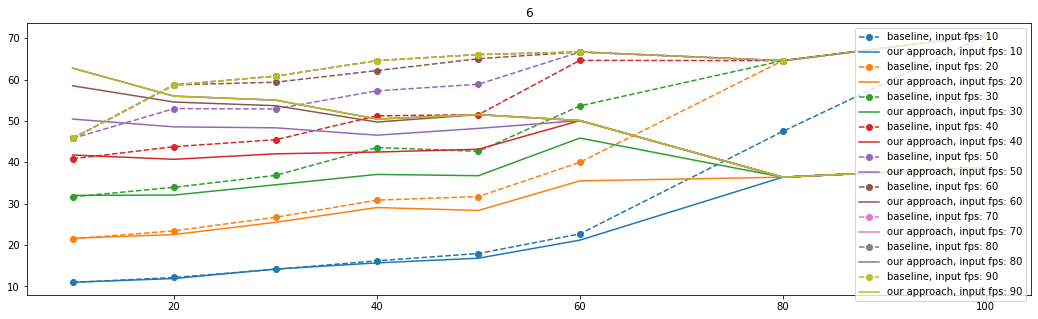

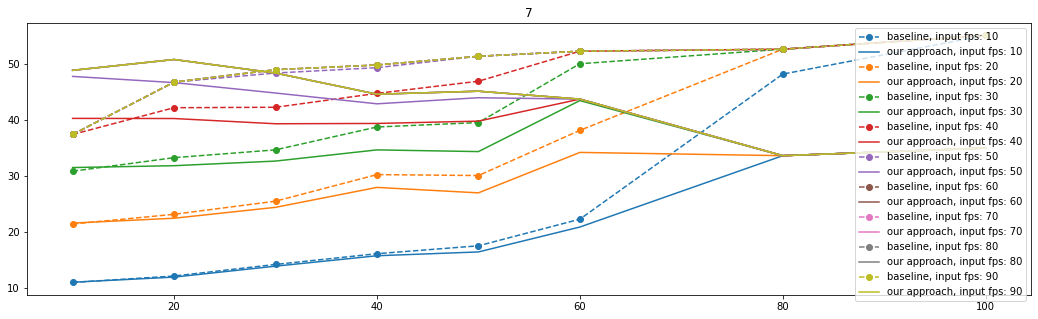

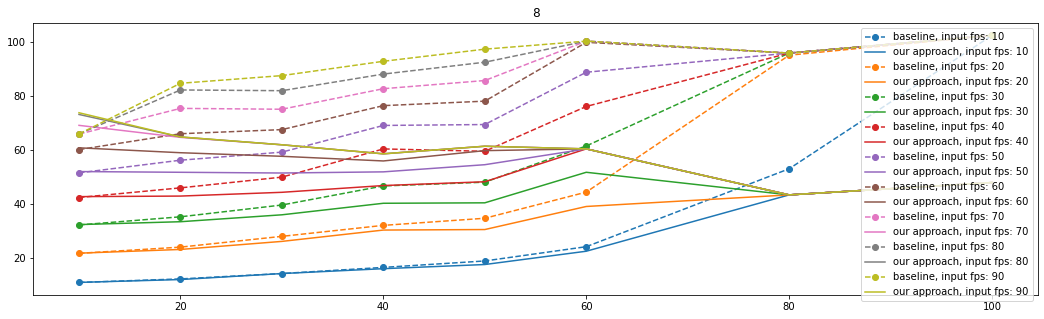

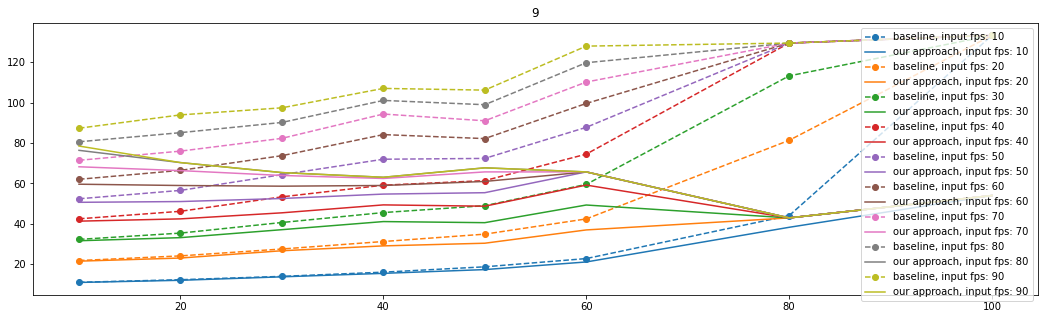

In [102]:
# plot lines

for video_sequence in optimized_approach_input_output_fps_mapping:
    plt.figure(figsize=(18,5))
    ax = plt.gca()
    
    for input_fps in optimized_approach_input_output_fps_mapping[video_sequence]:
        color = next(ax._get_lines.prop_cycler)['color']
        plt.plot(chunk_sizes, baseline_input_output_fps_mapping[video_sequence][input_fps], label = f"baseline, input fps: {input_fps}", linestyle="--", color = color, marker='o')
        plt.plot(chunk_sizes, optimized_approach_input_output_fps_mapping[video_sequence][input_fps], label = f"our approach, input fps: {input_fps}", color = color)
    plt.legend()
    plt.title(f"{video_sequence}")
    plt.show()